# JSON examples and exercise (SOLVED)
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

## imports for Python, Pandas

In [1]:
import json
import pandas as pd
import seaborn 

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [38]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [39]:
# use normalization to create tables from nested element
pd.json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [40]:
# further populate tables created from nested element
pd.json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [55]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [69]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [82]:
# Read data
df = pd.read_json('data/world_bank_projects.json')
df.columns

Index(['sector', 'supplementprojectflg', 'projectfinancialtype', 'prodline',
       'mjtheme', 'idacommamt', 'impagency', 'project_name', 'mjthemecode',
       'closingdate', 'totalcommamt', 'id', 'mjsector_namecode', 'docty',
       'sector1', 'lendinginstr', 'countrycode', 'sector2', 'totalamt',
       'mjtheme_namecode', 'boardapprovaldate', 'countryshortname', 'sector4',
       'prodlinetext', 'productlinetype', 'regionname', 'status',
       'country_namecode', 'envassesmentcategorycode', 'project_abstract',
       'approvalfy', 'projectdocs', 'lendprojectcost', 'lendinginstrtype',
       'theme1', 'grantamt', 'themecode', 'borrower', 'sectorcode', 'sector3',
       'majorsector_percent', 'board_approval_month', 'theme_namecode',
       'countryname', 'url', 'source', 'projectstatusdisplay', 'ibrdcommamt',
       'sector_namecode', '_id'],
      dtype='object')

In [83]:
# check if there are missing values in country name columns
df['country_namecode'].isna().sum()
df['countrycode'].isna().sum()
df['countryname'].isna().sum()
df['countryshortname'].isna().sum()
# none missing

0

## (1) 10 countries with most projects

In [84]:
df.countryname.value_counts()[:10]

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Nepal                              12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64

[Text(0.5, 1.0, 'Number of World Bank Projects per Country: The 10 Countries with the Most Number of Projects.'),
 Text(0.5, 0, ''),
 Text(0, 0.5, '')]

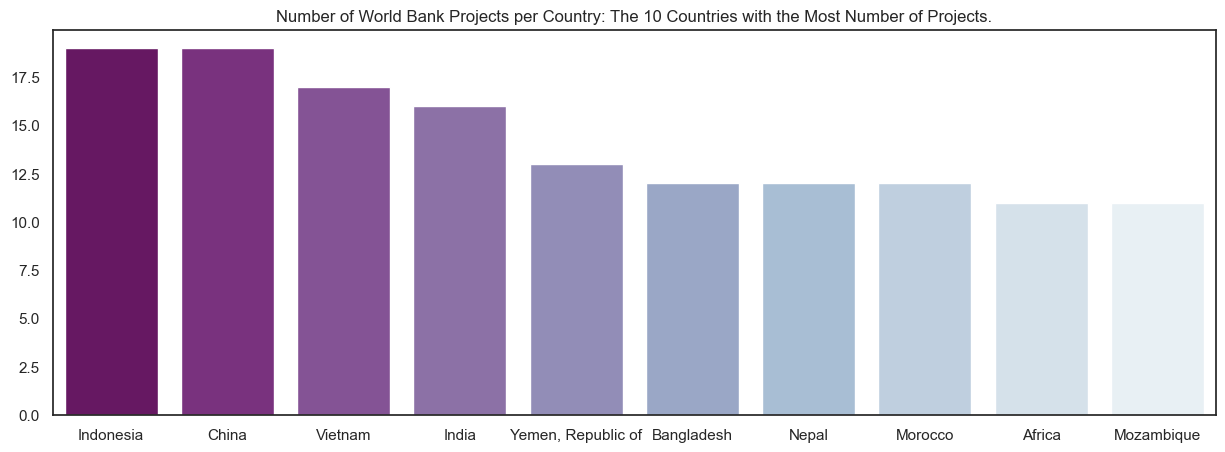

In [169]:
seaborn.set(rc={"figure.figsize": (15, 5)})
seaborn.set_context("notebook")#, rc={"font.size":2,"axes.titlesize":15,"axes.labelsize":2})   
seaborn.set_style("white")
seaborn.countplot(x = 'countryshortname', data = df, order=df.countryshortname.value_counts().iloc[:10].index, palette='BuPu_r').set(title='Number of World Bank Projects per Country: The 10 Countries with the Most Number of Projects.', xlabel="", ylabel="")

In the list of countries we see 'Africa', but Africa is not a country, it's a continent. Maybe this refers to South Africa or another African country. 

## (2) 10 major project themes

In [170]:
df.mjtheme_namecode.head()

0    [{'code': '8', 'name': 'Human development'}, {...
1    [{'code': '1', 'name': 'Economic management'},...
2    [{'code': '5', 'name': 'Trade and integration'...
3    [{'code': '7', 'name': 'Social dev/gender/incl...
4    [{'code': '5', 'name': 'Trade and integration'...
Name: mjtheme_namecode, dtype: object

In [171]:
with open('data/world_bank_projects.json') as file:
    data = json.load(file)

df_theme = pd.json_normalize(data, 'mjtheme_namecode')
df_theme.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


Some rows are missing the name of the theme, though they all have the code for the theme. When a theme name is missing, the cell is empty instead having a null value. We can see a difference in the top 10 themes if we calculate them using their name or their code.

The top 10 project theme using the theme code:

In [172]:
df_theme.code.value_counts()[:10]

11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
Name: code, dtype: int64

The top 10 themes using the name are below. We see that the counts differ and also, the 7th "theme" has no name.

In [173]:
df_theme.name.value_counts()[:10]

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

## (3) Filling empty cells for theme name

To start with, I check code against theme. We see below that while the theme code is included for all of the rows, the theme name is missing for some rows. As an illustration, for code '1', the theme name is missing for 5 cases while the theme name is specified as 'Economic Management' for 33 cases.

In [174]:
df_theme.groupby(['code', 'name']).size()

code  name                                        
1                                                       5
      Economic management                              33
10                                                     14
      Rural development                               202
11                                                     27
      Environment and natural resources management    223
2                                                      15
      Public sector governance                        184
3                                                       3
      Rule of law                                      12
4                                                      16
      Financial and private sector development        130
5                                                       5
      Trade and integration                            72
6                                                      10
      Social protection and risk management           158
7                    

To make it more obvious that there are missing theme names, I replace the empty cell with a 'NaN'. 

In [175]:
import numpy as np
df_theme.replace('', np.nan, inplace=True)
df_theme.groupby(['code', 'name'], dropna=False).size()

code  name                                        
1     Economic management                              33
      NaN                                               5
10    Rural development                               202
      NaN                                              14
11    Environment and natural resources management    223
      NaN                                              27
2     Public sector governance                        184
      NaN                                              15
3     Rule of law                                      12
      NaN                                               3
4     Financial and private sector development        130
      NaN                                              16
5     Trade and integration                            72
      NaN                                               5
6     Social protection and risk management           158
      NaN                                              10
7     Social dev/gend

We can fill the missing values by putting the theme name corresponding to the theme code. From the table above we know the theme name for each theme code, so it would be easy to fill in all of the theme names.

In [176]:
# create codebook
# (1) drop na so it doesn't combine 'NaN' & code
df_nona = df_theme[df_theme.name.notna()]
df_nona.head()
# (2) create a dictionary mapping theme code to name
code_theme = dict(zip(df_nona['code'], df_nona['name']))
print(code_theme)


{'8': 'Human development', '1': 'Economic management', '6': 'Social protection and risk management', '5': 'Trade and integration', '2': 'Public sector governance', '11': 'Environment and natural resources management', '7': 'Social dev/gender/inclusion', '4': 'Financial and private sector development', '10': 'Rural development', '9': 'Urban development', '3': 'Rule of law'}


In [177]:
# fill in with corresponding theme
df_theme['name_complete'] = df_theme.name.fillna(df_theme.code.map(code_theme))
df_theme.head()

,code,name,name_complete
0,8,Human development,Human development
1,11,NaN,Environment and natural resources management
2,1,Economic management,Economic management
3,6,Social protection and risk management,Social protection and risk management
4,5,Trade and integration,Trade and integration


We can see that now in the new column, *name complete*, the missing names have been included. Below, we can now calculate the themes with the most projects using the theme name. We see that the counts match the counts we obtained above using the column *code*.

In [178]:
df_theme.name_complete.value_counts()[:10]

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name_complete, dtype: int64

[Text(0.5, 1.0, 'Number of World Bank Projects per Theme.'),
 Text(0.5, 0, ''),
 Text(0, 0.5, '')]

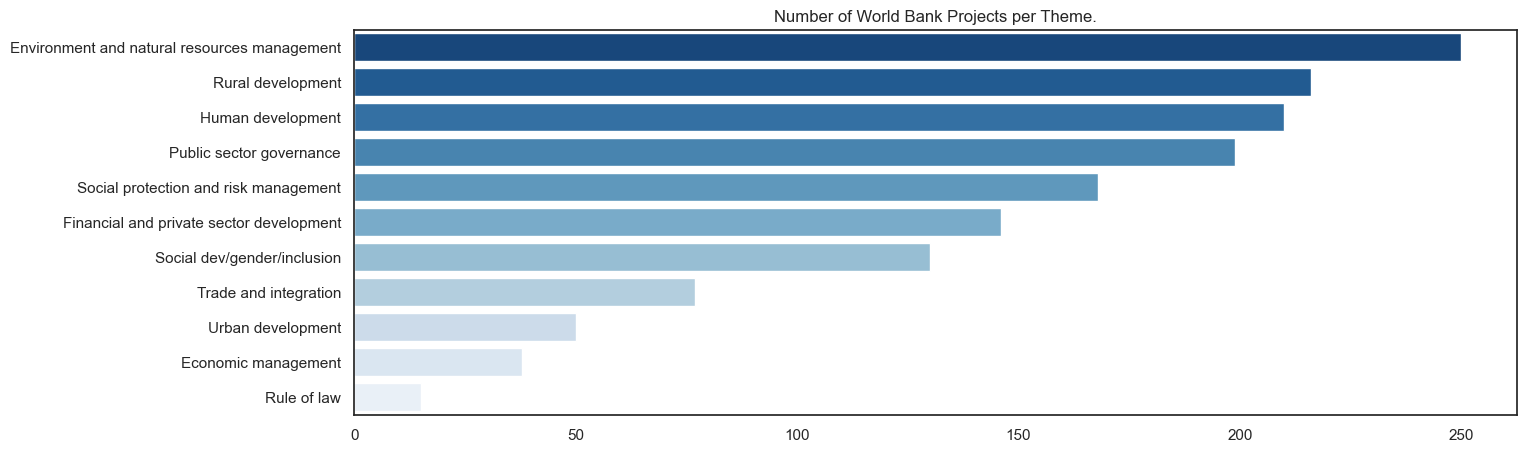

In [179]:
seaborn.set(rc={"figure.figsize": (15, 5)})
seaborn.set_context("notebook")#, rc={"font.size":2,"axes.titlesize":15,"axes.labelsize":2})   
seaborn.set_style("white")
seaborn.countplot(y= 'name_complete', data = df_theme, order=df_theme.name_complete.value_counts().index, palette='Blues_r').set(title='Number of World Bank Projects per Theme.', xlabel="", ylabel="")